In [31]:
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
data1 = pd.read_csv('Data22.csv')

In [9]:
data1.head()

,input,output
0,1,11
1,3,31
2,5,51
3,8,81
4,9,91


In [10]:
X = data1[['input']].values

In [11]:
X

array([[1],
       [3],
       [5],
       [8],
       [9]])

In [12]:
X = data1[["input"]].values

In [13]:
Y = data1[["output"]].values

In [14]:
X

array([[1],
       [3],
       [5],
       [8],
       [9]])

In [15]:
Y

array([[11],
       [31],
       [51],
       [81],
       [91]])

In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [17]:
scalar=MinMaxScaler()

In [18]:
scalar.fit(X_train)
scalar.fit(X_test)

MinMaxScaler()

In [19]:
X_train=scalar.transform(X_train)

In [20]:
X_test=scalar.transform(X_test)

In [21]:
import tensorflow as tf


In [22]:
model=tf.keras.Sequential([tf.keras.layers.Dense(8,activation='relu'),
                          tf.keras.layers.Dense(16,activation='relu'),
                          tf.keras.layers.Dense(1)])

In [23]:
model.compile(loss="mae",optimizer="rmsprop",metrics=["mse"])

In [37]:
history=model.fit(X_train,Y_train,epochs=2500)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 0.0906 - mse: 0.0093
Epoch 2/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.0902 - mse: 0.0150
Epoch 3/2500
1/1 [==============================] - 0s 10ms/step - loss: 0.0909 - mse: 0.0093
Epoch 4/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.0899 - mse: 0.0149
Epoch 5/2500
1/1 [==============================] - 0s 8ms/step - loss: 0.0912 - mse: 0.0094
Epoch 6/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.0895 - mse: 0.0148
Epoch 7/2500
1/1 [==============================] - 0s 10ms/step - loss: 0.0916 - mse: 0.0095
Epoch 8/2500
1/1 [==============================] - 0s 7ms/step - loss: 0.0892 - mse: 0.0147
Epoch 9/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.0919 - mse: 0.0095
Epoch 10/2500
1/1 [==============================] - 0s 9ms/step - loss: 0.0889 - mse: 0.0146
Epoch 11/2500
1/1 [=========

In [38]:
import numpy as np

In [39]:
X_test

array([[0.]])

In [40]:
preds=model.predict(X_test)
np.round(preds)

array([[31.]], dtype=float32)

In [42]:
tf.round(model.predict([[20]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[231.]], dtype=float32)>

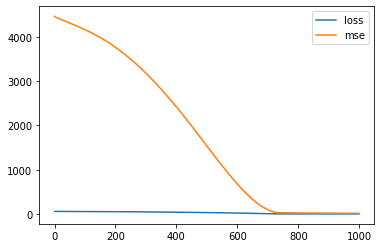

In [29]:
pd.DataFrame(history.history).plot()

In [30]:
r=tf.keras.metrics.RootMeanSquaredError()
r(Y_test,preds)

<tf.Tensor: shape=(), dtype=float32, numpy=12.594616>